# Olist Ecommerce Analysis

#### I have analyzed the dataset through some questions.
#### All the questions i have tried to answer are given below: 
    
    * Who are our most valuable customers?
    * Which states have the most active customers?
    * What are the average order values for customers by location?
    * Do customer demographics correlate with higher review scores?
    * Which product categories generate the most revenue?
    * What is the average review score for each product category?
    * Which products have the highest return rates or cancellations?
    * Are there size or weight trends for high-selling products?
    * Which regions experience the highest delivery delays?
    * How does freight value vary by region and product type?
    * What is the monthly revenue trend?
    * Which payment methods contribute the most revenue?
    * What is the average number of installments chosen by customers?
    * Which sellers have the best shipping performance?
    * What is the correlation between freight cost and delivery speed?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olist_customers_df = pd.read_csv("H:/Datasets/Ecommerce/olist_customers_dataset.csv")
olist_geolocation_df = pd.read_csv("H:/Datasets/Ecommerce/olist_geolocation_dataset.csv")
olist_order_items_df = pd.read_csv("H:/Datasets/Ecommerce/olist_order_items_dataset.csv")
olist_order_payments_df = pd.read_csv("H:/Datasets/Ecommerce/olist_order_payments_dataset.csv")
olist_order_reviews_df = pd.read_csv("H:/Datasets/Ecommerce/olist_order_reviews_dataset.csv")
olist_orders_df = pd.read_csv("H:/Datasets/Ecommerce/olist_orders_dataset.csv")
olist_products_df = pd.read_csv("H:/Datasets/Ecommerce/olist_products_dataset.csv")
olist_sellers_df = pd.read_csv("H:/Datasets/Ecommerce/olist_sellers_dataset.csv")
product_category_name_translation_df = pd.read_csv("H:/Datasets/Ecommerce/product_category_name_translation.csv")

### Transformations (analyzed from the Olist Ecommerce Exploration)
Link: https://github.com/Devender-Singh-Bisht/Olist-Ecommerce-Analysis/blob/main/Olist%20Ecommerce%20Exploration.ipynb

In [4]:
# Removing duplicates
olist_geolocation_df = olist_geolocation_df.drop_duplicates()


# It consists of different values for latitude and longitude for single zip code due to which 
# it is difficult to use it. Now we will group the dataset with same zip_code
geo_aggregated = olist_geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state': 'first'
}).reset_index()


# Changing the data type of columns into date time
olist_orders_df["order_purchase_timestamp"] = pd.to_datetime(olist_orders_df["order_purchase_timestamp"])
olist_orders_df["order_approved_at"] = pd.to_datetime(olist_orders_df["order_approved_at"])
olist_orders_df["order_delivered_carrier_date"] = pd.to_datetime(olist_orders_df["order_delivered_carrier_date"])
olist_orders_df["order_delivered_customer_date"] = pd.to_datetime(olist_orders_df["order_delivered_customer_date"])
olist_orders_df["order_estimated_delivery_date"] = pd.to_datetime(olist_orders_df["order_estimated_delivery_date"])


# Changing data type of shipping_limit_date to datetime
olist_order_items_df["shipping_limit_date"] = pd.to_datetime(olist_order_items_df["shipping_limit_date"])


# Changing the data type of datetime columns
olist_order_reviews_df["review_creation_date"] = pd.to_datetime(olist_order_reviews_df["review_creation_date"])
olist_order_reviews_df["review_answer_timestamp"] = pd.to_datetime(olist_order_reviews_df["review_answer_timestamp"])

### Who are our most valuable customers?

In [5]:
payments_order_merge = pd.merge(olist_order_payments_df,
         olist_orders_df, 
         how = "left", 
         on = "order_id"
)
payments_order_customers_merge = pd.merge(payments_order_merge, 
         olist_customers_df, 
        how = "left", 
        on = "customer_id")

In [6]:
top_10_customers_with_payment_value = payments_order_customers_merge.groupby('customer_unique_id')["payment_value"].mean().sort_values(ascending = False).head(10)

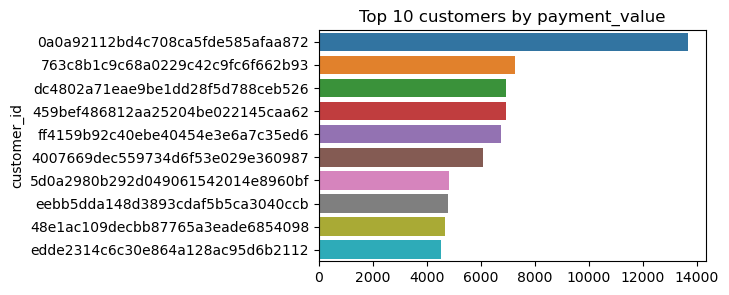

In [7]:
plt.figure(figsize = (5, 3))
sns.barplot(
            x = top_10_customers_with_payment_value.values, 
            y = top_10_customers_with_payment_value.index, 
            orient = "h")
plt.ylabel("customer_id")
plt.title("Top 10 customers by payment_value")
plt.show()

### Which states have the most active customers?

In [8]:
order_customers_merge = pd.merge(olist_orders_df, 
         olist_customers_df, 
        how = "left", 
        on = "customer_id")

In [9]:
state_wise_customers = order_customers_merge.groupby('customer_state')["customer_unique_id"].nunique().sort_values(ascending = False)

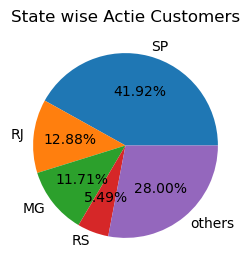

In [10]:
plt.figure(figsize = (5, 3))
plt.pie(
        list(state_wise_customers[:4].values) + [state_wise_customers[4:].values.sum()], 
        labels = list(state_wise_customers[:4].index) + ["others"], 
        autopct='%.2f%%'
)
plt.title("State wise Actie Customers")
plt.show()

### What are the average order values for customers by location?

In [11]:
order_item_customers_merge = pd.merge(olist_order_items_df, 
        order_customers_merge, 
        how = "left", 
        on = "order_id")

In [12]:
avg_order_state_wise = order_item_customers_merge.groupby("customer_state")["price"].mean().sort_values()

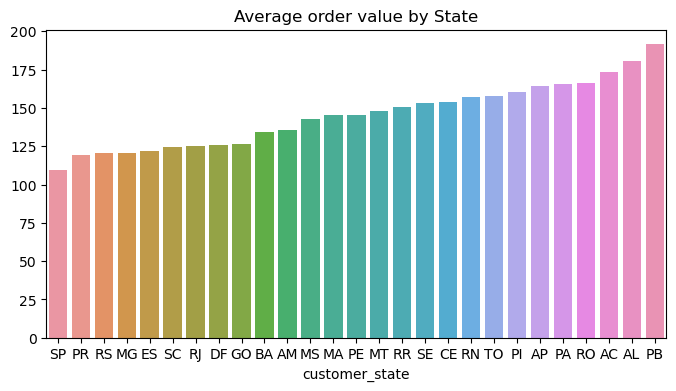

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x = avg_order_state_wise.index,
    y = avg_order_state_wise.values
)
plt.title("Average order value by State")
plt.show()

In [14]:
avg_order_city_wise_top_10 = order_item_customers_merge.groupby("customer_city")["price"].mean().sort_values(ascending = False).head(10)

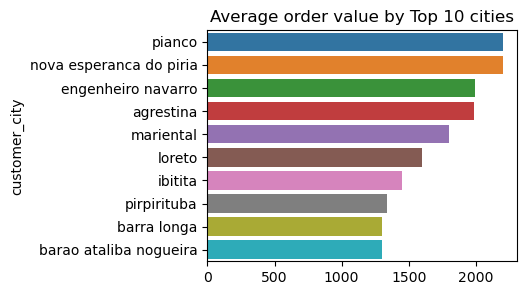

In [15]:
plt.figure(figsize=(4, 3))
sns.barplot(
    x = avg_order_city_wise_top_10.values,
    y = avg_order_city_wise_top_10.index,
    orient = "h"
)
plt.title("Average order value by Top 10 cities")
plt.show()

### Do customer demographics correlate with higher review scores?

In [16]:
order_reviews_customers_merge = pd.merge(olist_order_reviews_df, 
        order_customers_merge, 
        how = "left", 
        on = "order_id")

In [17]:
avg_reviewscore_state_wise = order_reviews_customers_merge.groupby("customer_state")["review_score"].mean().sort_values(ascending = False)

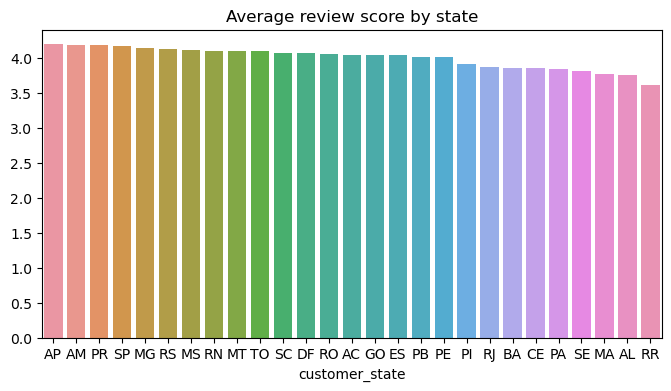

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x = avg_reviewscore_state_wise.index,
    y = avg_reviewscore_state_wise.values
)
plt.title("Average review score by state")
plt.show()

### Which product categories generate the most revenue?

In [19]:
olist_products_english_df = pd.merge(olist_products_df,
         product_category_name_translation_df,
         how = "left",
         on = "product_category_name"
)

order_item_products_merge = pd.merge(olist_order_items_df,
         olist_products_english_df,
         how = "left",
         on = "product_id"
)

In [20]:
most_revenue_product_category = order_item_products_merge.groupby("product_category_name_english")["price"].sum().sort_values(ascending = False).head(10)

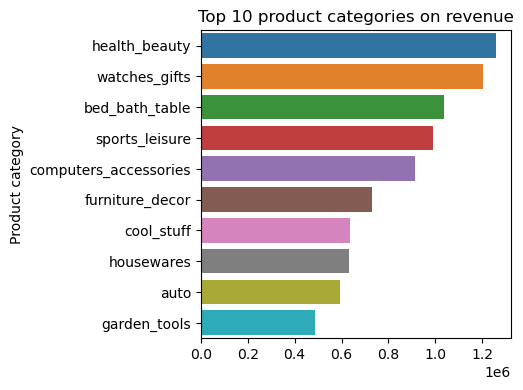

In [21]:
plt.figure(figsize = (4, 4))
sns.barplot(
    x = most_revenue_product_category.values,
    y = most_revenue_product_category.index,
)
plt.title("Top 10 product categories on revenue")
plt.ylabel("Product category")
plt.show()

### What is the average review score for each product category?

In [22]:
order_item_products_reviews_merge = pd.merge(
    order_item_products_merge, 
    olist_order_reviews_df,
    how = "left",
    on = "order_id"
)

In [23]:
orders_product_reviews_groupby = (
    order_item_products_reviews_merge
    .groupby(["order_id", "product_category_name_english"])["review_score"]
    .mean()
    .reset_index()
)

product_wise_avg_review = (
    orders_product_reviews_groupby
    .groupby("product_category_name_english")["review_score"]
    .mean()
)

In [24]:
product_wise_avg_review

product_category_name_english
agro_industry_and_commerce    4.021978
air_conditioning              4.028112
art                           4.025000
arts_and_craftmanship         4.173913
audio                         3.834294
                                ...   
stationery                    4.244662
tablets_printing_image        4.155844
telephony                     4.003119
toys                          4.189333
watches_gifts                 4.065459
Name: review_score, Length: 71, dtype: float64

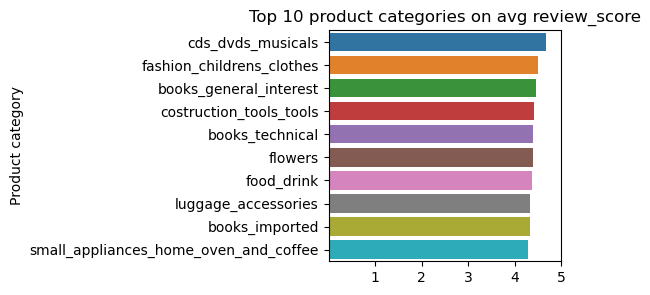

In [25]:
plt.figure(figsize = (3, 3))
sns.barplot(
    x = product_wise_avg_review.sort_values(ascending = False).head(10).values,
    y = product_wise_avg_review.sort_values(ascending = False).head(10).index
)
plt.title("Top 10 product categories on avg review_score")
plt.ylabel("Product category")
plt.xticks(list(range(1,6)))
plt.show()

### Which products have the highest return rates or cancellations?

In [26]:
order_items_products_merge_orders_merge = pd.merge(
    order_item_products_merge,
    olist_orders_df,
    how = "left",
    on = "order_id"
)

In [27]:
canceled_orders_items = order_items_products_merge_orders_merge[order_items_products_merge_orders_merge["order_status"] == "canceled"]

In [28]:
cancelled_counts_of_products = canceled_orders_items.groupby("product_category_name_english").count()["order_id"].sort_values(ascending = False)

In [29]:
# Cancellation Rates of Different Products categories.
cancelled_counts_of_products / cancelled_counts_of_products.sum() * 100

product_category_name_english
sports_leisure                             9.695817
housewares                                 9.315589
computers_accessories                      8.745247
health_beauty                              6.844106
furniture_decor                            6.844106
toys                                       6.463878
auto                                       5.703422
watches_gifts                              3.992395
baby                                       3.802281
garden_tools                               3.612167
telephony                                  3.422053
bed_bath_table                             3.422053
cool_stuff                                 3.041825
perfumery                                  2.851711
stationery                                 2.281369
musical_instruments                        2.091255
electronics                                2.091255
consoles_games                             1.901141
small_appliances                  

### Are there size or weight trends for high-selling products?

In [30]:
products_with_most_orders = order_items_products_merge_orders_merge["product_id"].value_counts().head(50)

In [31]:
products_with_most_orders_products_merge = pd.merge(
    products_with_most_orders.reset_index(),
    olist_products_df,
    how = "left",
    on = "product_id"
)

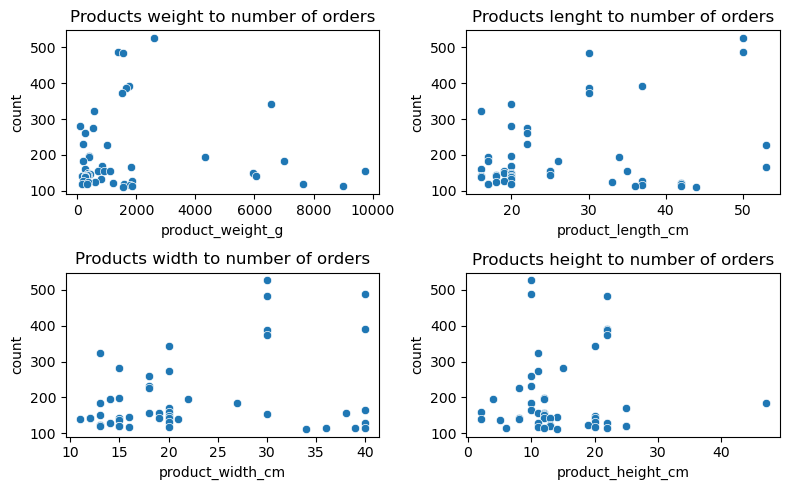

In [32]:
# Plotting the maximum customers zip code, city and state.
fig, axes = plt.subplots(2, 2, figsize = (8, 5))

sns.scatterplot(
    x = products_with_most_orders_products_merge["product_weight_g"], 
    y = products_with_most_orders_products_merge["count"],
    ax = axes[0, 0]
)
axes[0, 0].set_title("Products weight to number of orders")


sns.scatterplot(
    x = products_with_most_orders_products_merge["product_length_cm"], 
    y = products_with_most_orders_products_merge["count"],
    ax = axes[0, 1]
)
axes[0, 1].set_title("Products lenght to number of orders")

sns.scatterplot(
    x = products_with_most_orders_products_merge["product_width_cm"], 
    y = products_with_most_orders_products_merge["count"],
    ax = axes[1, 0]
)
axes[1, 0].set_title("Products width to number of orders")

sns.scatterplot(
    x = products_with_most_orders_products_merge["product_height_cm"], 
    y = products_with_most_orders_products_merge["count"],
    ax = axes[1, 1]
)
axes[1, 1].set_title("Products height to number of orders")

plt.tight_layout()
plt.show()

### Which regions experience the highest delivery delays?

In [33]:
### delayed_orders = (order_customers_merge
 [(order_customers_merge["order_estimated_delivery_date"]
   < order_customers_merge["order_delivered_customer_date"])]
)

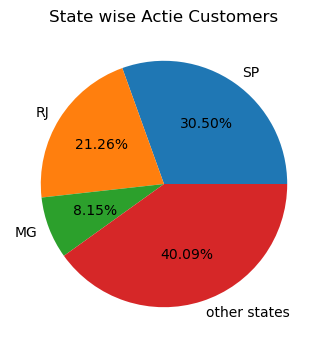

In [34]:
# More than 50% of delays occurs in RJ and SP.

plt.figure(figsize = (4, 4))
plt.pie(
        list(delayed_orders["customer_state"].value_counts()[:3].values) + [delayed_orders["customer_state"].value_counts()[3:].values.sum()], 
        labels = list(delayed_orders["customer_state"].value_counts()[:3].index) + ["other states"], 
        autopct='%.2f%%'
)
plt.title("State wise Actie Customers")
plt.show()

### How does freight value vary by region and product type?

In [35]:
order_item_customers_products_merge = pd.merge(order_item_customers_merge,
         olist_products_english_df,
         how = "left",
         on = "product_id"
)

In [36]:
state_and_product_category_wise_freight_value = (order_item_customers_products_merge
 .groupby(["order_id", "product_category_name_english"])
 .agg({"freight_value": "first", "customer_state": "first"})
 .reset_index()
 .groupby(["customer_state", "product_category_name_english"])
 .mean(numeric_only = True)
)

In [37]:
# All the state and product category wise freight value can be checked from this table.

state_and_product_category_wise_freight_value

freight_value
customer_state product_category_name_english               
AC             auto                               30.232500
               baby                               58.043333
               bed_bath_table                     38.750000
               books_general_interest             61.855000
               christmas_supplies                 60.950000
...                                                     ...
TO             sports_leisure                     53.260000
               stationery                         24.600000
               telephony                          29.515000
               toys                               33.585000
               watches_gifts                      33.097778

[1356 rows x 1 columns]

### What is the monthly revenue trend?

In [38]:
order_payments_orders_merge = pd.merge(olist_order_payments_df,
         olist_orders_df,
         how = "left",
         on = "order_id"
)

order_payments_orders_merge["purchase_month"] = order_payments_orders_merge["order_purchase_timestamp"].dt.month_name()

In [39]:
month_wise_revenue = order_payments_orders_merge.groupby("purchase_month")["payment_value"].sum()

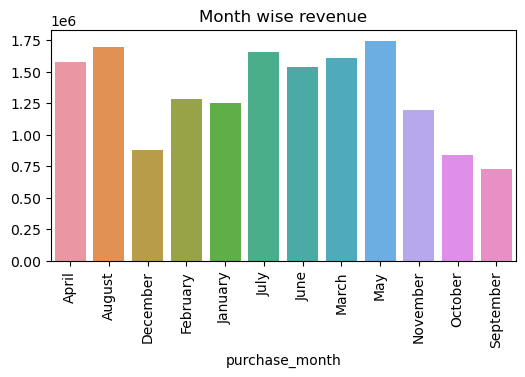

In [40]:
# Revenue is lower from September to February and higher from March to August.

plt.figure(figsize = (6,3))
sns.barplot(
    x = month_wise_revenue.index,
    y = month_wise_revenue.values
)
plt.xticks(rotation = 90)
plt.title("Month wise revenue")
plt.show()

### Which payment methods contribute the most revenue?

In [41]:
payment_value_by_payment_type = order_payments_orders_merge.groupby("payment_type")["payment_value"].sum()

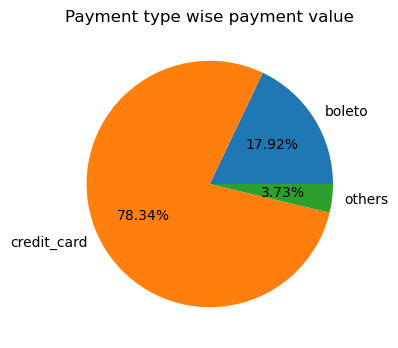

In [42]:
plt.figure(figsize = (4, 4))
plt.pie(
    list(payment_value_by_payment_type[:2].values) + [payment_value_by_payment_type[2:].values.sum()],
    labels = list(payment_value_by_payment_type[:2].index) + ["others"],
    autopct='%.2f%%'
)
plt.title("Payment type wise payment value")
plt.show()

### What is the average number of installments chosen by customers?

In [43]:
olist_order_payments_df["payment_installments"].mean()

2.853348863176944

### What are the top-selling product categories during peak times?

In [44]:
top_selling_product_categories_during_peak_time = (order_items_products_merge_orders_merge
 [order_items_products_merge_orders_merge["order_purchase_timestamp"].dt.month.isin([8, 5, 7, 3])]
 ["product_category_name_english"].value_counts()
 .head(7)
)

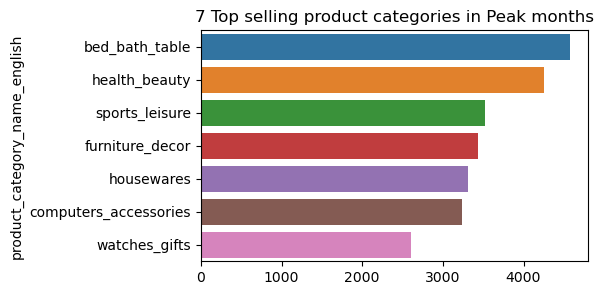

In [45]:
plt.figure(figsize = (5,3))
sns.barplot(
    x = top_selling_product_categories_during_peak_time.values,
    y = top_selling_product_categories_during_peak_time.index,
    orient = "h"
)

plt.title("7 Top selling product categories in Peak months")
plt.show()

### Which sellers have the best shipping performance?

In [46]:
order_items_orders_merge = pd.merge(olist_order_items_df,
         olist_orders_df,
         how = "left",
         on = "order_id"
)

In [47]:
order_items_orders_merge["delivery_diff"] = (order_items_orders_merge["order_estimated_delivery_date"]
 - order_items_orders_merge["order_delivered_customer_date"])

In [48]:
sellers_with_best_shippings = (order_items_orders_merge.groupby("seller_id")
 .agg({"delivery_diff": "mean", "order_id": "count"})
 .sort_values(by = "delivery_diff", ascending = False)
)

In [49]:
# I have considered only those sellers who have shipped more than one order.

sellers_with_best_shippings[sellers_with_best_shippings["order_id"] > 1].head(10)

,delivery_diff,order_id
seller_id,,
933446e9a59dece7ae9175103820ca8f,65 days 07:43:50,3
ffff564a4f9085cd26170f4732393726,47 days 13:10:37.625000,20
432c67955c0acd1fd6b0b5d678766a71,47 days 12:57:36,3
58e4b302b54937e55a678c4d15111da4,47 days 09:01:53,3
939f6e231201f26803cb5c3a3d2940b3,47 days 09:01:22.250000,4
4bde6149c15cf7e177b36fa060dd6de8,46 days 21:34:39,2
6dc9bec584588412a6a338830946a3e4,43 days 16:50:52,2
b92e3c8f9738272ff7c59e111e108d7c,42 days 05:09:25.585714285,70
0336182e1b3e92f029d5354832045fdf,41 days 03:22:27,2


### What is the correlation between freight cost and delivery speed?

In [50]:
order_items_orders_merge["delivered_within"] = (order_items_orders_merge["order_delivered_customer_date"]
 - order_items_orders_merge["order_purchase_timestamp"])

In [51]:
# They are not much correlated to each other.

order_items_orders_merge[["delivered_within", "freight_value"]].corr()

,delivered_within,freight_value
delivered_within,1.00000,-0.01759
freight_value,-0.01759,1.00000
